## Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

## Import Dataset

In [2]:
df = pd.read_csv('C:\\Users\\Lenovo\\Downloads\\Company data.csv')

In [3]:
df.head(2)

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17


### Exploratory Data Analysis

##### shape

In [4]:
df.shape

(3541, 52)

##### Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 52 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          3541 non-null   int64  
 1   Networth Next Year                           3541 non-null   float64
 2   Total assets                                 3541 non-null   float64
 3   Net worth                                    3541 non-null   float64
 4   Total income                                 3343 non-null   float64
 5   Change in stock                              3083 non-null   float64
 6   Total expenses                               3402 non-null   float64
 7   Profit after tax                             3410 non-null   float64
 8   PBDITA                                       3410 non-null   float64
 9   PBT                                          3410 non-null   float64
 10  

##### columns

In [6]:
df.columns

Index(['Num', 'Networth Next Year', 'Total assets', 'Net worth',
       'Total income', 'Change in stock', 'Total expenses', 'Profit after tax',
       'PBDITA', 'PBT', 'Cash profit', 'PBDITA as % of total income',
       'PBT as % of total income', 'PAT as % of total income',
       'Cash profit as % of total income', 'PAT as % of net worth', 'Sales',
       'Income from financial services', 'Other income', 'Total capital',
       'Reserves and funds', 'Deposits (accepted by commercial banks)',
       'Borrowings', 'Current liabilities & provisions',
       'Deferred tax liability', 'Shareholders funds',
       'Cumulative retained profits', 'Capital employed', 'TOL/TNW',
       'Total term liabilities / tangible net worth',
       'Contingent liabilities / Net worth (%)', 'Contingent liabilities',
       'Net fixed assets', 'Investments', 'Current assets',
       'Net working capital', 'Quick ratio (times)', 'Current ratio (times)',
       'Debt to equity ratio (times)', 'Cash to cur

#### We have some ambiguity in columns name so we filter the columns make clean columns name

In [7]:
df.columns = df.columns.str.replace ('%' , 'percentage').str.replace('(' , '').str.replace(')' ,'').str.replace('/' ,'_to_').str.replace(' ' , '_')

In [8]:
df.columns

Index(['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_percentage_of_total_income',
       'PBT_as_percentage_of_total_income',
       'PAT_as_percentage_of_total_income',
       'Cash_profit_as_percentage_of_total_income',
       'PAT_as_percentage_of_net_worth', 'Sales',
       'Income_from_financial_services', 'Other_income', 'Total_capital',
       'Reserves_and_funds', 'Deposits_accepted_by_commercial_banks',
       'Borrowings', 'Current_liabilities_&_provisions',
       'Deferred_tax_liability', 'Shareholders_funds',
       'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW',
       'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_percentage',
       'Contingent_liabilities', 'Net_fixed_assets', 'Investments',
       'Current_assets', 'Net_working_capital', 'Quick_ratio_times',
     

#### Insights : Here we replace (% ,/ , () , ' ')  ambiguity in proper format means we make into proper format

In [9]:
print("The number of observations are " , df.shape[0] , '\n', 'The number of features are ' , df.shape[1])

The number of observations are  3541 
 The number of features are  52


### Describe

In [10]:
df.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
count,3541.000000,3541.000000,3.541000e+03,3541.000000,3.343000e+03,3083.000000,3.402000e+03,3410.00000,3410.000000,3410.000000,...,3213.000000,2801.000000,2901.000000,3180.000000,2.849000e+03,2849.000000,3541.000000,3541.000000,3.541000e+03,1347.000000
mean,1772.451567,1616.256199,3.443382e+03,1295.862214,4.582823e+03,41.489264,4.262931e+03,277.36044,578.056305,383.810088,...,17.041261,87.078725,27.930469,19.088399,2.206739e+07,-1333.698175,-220.316436,-221.512285,3.443382e+03,63.905687
std,1023.731393,17459.639673,3.097089e+04,13387.891867,5.568124e+04,440.573761,5.302869e+04,3064.40606,5653.770427,4117.069953,...,83.943754,598.545835,151.042868,376.340737,1.655193e+08,37500.729972,14261.946209,14261.923760,3.097089e+04,1433.809532
min,1.000000,-74265.600000,1.000000e-01,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.30000,-440.700000,-3894.800000,...,0.000000,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-843181.820000,-843181.820000,1.000000e-01,-1116.640000
25%,886.000000,31.700000,9.130000e+01,31.300000,1.064500e+02,-1.800000,9.582500e+01,0.50000,6.900000,0.700000,...,3.760000,8.200000,5.100000,2.990000,1.316250e+06,10.000000,0.000000,0.000000,9.130000e+01,3.275000
50%,1773.000000,116.300000,3.097000e+02,102.300000,4.449000e+02,1.600000,4.077000e+02,8.80000,35.400000,12.400000,...,6.320000,17.270000,9.760000,6.400000,4.672063e+06,10.000000,1.430000,1.180000,3.097000e+02,9.100000
75%,2658.000000,456.100000,1.098700e+03,377.300000,1.440900e+03,18.050000,1.359775e+03,52.27500,150.250000,71.975000,...,11.680000,40.350000,20.240000,11.845000,1.065197e+07,10.000000,9.620000,7.480000,1.098700e+03,17.790000
max,3545.000000,805773.400000,1.176509e+06,613151.600000,2.442828e+06,14185.500000,2.366035e+06,119439.10000,208576.500000,145292.600000,...,3135.200000,17947.600000,5651.400000,21092.000000,4.130401e+09,100000.000000,34522.530000,34522.530000,1.176509e+06,51002.740000


#### Insights : Networth_Next_Year is the target variable here means what is comany's next year revenue but we noticed one thing there is negative value also so we make this problem statement as binary classification means we will predict will next year get profit or not.

##### Here in problem statement says will get profit or not thats why we make as target variable there . if it ask for how much revenue will generate then we will build regression model

In [11]:
df['default'] = np.where(df['Networth_Next_Year'] > 0 , 1 , 0)

#### Insights : we create one target variable in the dataset . when Networth_Next_Year columns value is greater than 0 then we make as 1 and when value is less than 0 then make it as 0.  

In [12]:
df.head(2)

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,default
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31,1
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17,1


In [13]:
df[['default' , 'Networth_Next_Year']].head(20)

,default,Networth_Next_Year
0,1,8890.6
1,1,394.3
2,1,92.2
3,1,2.7
4,1,109.0
5,1,688.6
6,1,246.0
7,1,13.7
8,1,291.5
9,0,-7.3


##### Insights : We clearly see where negative value is there we treat by 0 only 

In [14]:
df['default'].value_counts()

1    3298
0     243
Name: default, dtype: int64

In [15]:
df['default'].value_counts(normalize = True) * 100

1    93.137532
0     6.862468
Name: default, dtype: float64

##### Insights : Data is clearly imbalance

#### Checking missing values

In [16]:
df.isnull().sum()

Num                                                    0
Networth_Next_Year                                     0
Total_assets                                           0
Net_worth                                              0
Total_income                                         198
Change_in_stock                                      458
Total_expenses                                       139
Profit_after_tax                                     131
PBDITA                                               131
PBT                                                  131
Cash_profit                                          131
PBDITA_as_percentage_of_total_income                  68
PBT_as_percentage_of_total_income                     68
PAT_as_percentage_of_total_income                     68
Cash_profit_as_percentage_of_total_income             68
PAT_as_percentage_of_net_worth                         0
Sales                                                259
Income_from_financial_services 

In [17]:
df.isnull().sum() / len(df) * 100

Num                                                   0.000000
Networth_Next_Year                                    0.000000
Total_assets                                          0.000000
Net_worth                                             0.000000
Total_income                                          5.591641
Change_in_stock                                      12.934199
Total_expenses                                        3.925445
Profit_after_tax                                      3.699520
PBDITA                                                3.699520
PBT                                                   3.699520
Cash_profit                                           3.699520
PBDITA_as_percentage_of_total_income                  1.920361
PBT_as_percentage_of_total_income                     1.920361
PAT_as_percentage_of_total_income                     1.920361
Cash_profit_as_percentage_of_total_income             1.920361
PAT_as_percentage_of_net_worth                        0

#### Insights : We have multiple features contains missing data

In [18]:
df.isnull().sum().sum()

18533

#### Insights : This is the total sum of every columns missing values

#### We segregate whole data in dependent and independent variable

In [19]:
df_x = df.drop('default' , axis = 1)
df_y = pd.DataFrame(df['default'] , columns = ['default'])

In [20]:
df_x.head(2)

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17


In [21]:
df_x.columns

Index(['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_percentage_of_total_income',
       'PBT_as_percentage_of_total_income',
       'PAT_as_percentage_of_total_income',
       'Cash_profit_as_percentage_of_total_income',
       'PAT_as_percentage_of_net_worth', 'Sales',
       'Income_from_financial_services', 'Other_income', 'Total_capital',
       'Reserves_and_funds', 'Deposits_accepted_by_commercial_banks',
       'Borrowings', 'Current_liabilities_&_provisions',
       'Deferred_tax_liability', 'Shareholders_funds',
       'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW',
       'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_percentage',
       'Contingent_liabilities', 'Net_fixed_assets', 'Investments',
       'Current_assets', 'Net_working_capital', 'Quick_ratio_times',
     

#### Check duplicate data

In [22]:
df[df.duplicated()]

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,default


##### Insights : we don't have any duplicate data

In [23]:
df_y.head(2)

,default
0,1
1,1


In [24]:
df_y.columns

Index(['default'], dtype='object')

## Data Preprocessing

#### 1. Handling missing values

In [25]:
df.isnull().sum()

Num                                                    0
Networth_Next_Year                                     0
Total_assets                                           0
Net_worth                                              0
Total_income                                         198
Change_in_stock                                      458
Total_expenses                                       139
Profit_after_tax                                     131
PBDITA                                               131
PBT                                                  131
Cash_profit                                          131
PBDITA_as_percentage_of_total_income                  68
PBT_as_percentage_of_total_income                     68
PAT_as_percentage_of_total_income                     68
Cash_profit_as_percentage_of_total_income             68
PAT_as_percentage_of_net_worth                         0
Sales                                                259
Income_from_financial_services 

In [26]:
df.isnull().sum() / len(df) * 100

Num                                                   0.000000
Networth_Next_Year                                    0.000000
Total_assets                                          0.000000
Net_worth                                             0.000000
Total_income                                          5.591641
Change_in_stock                                      12.934199
Total_expenses                                        3.925445
Profit_after_tax                                      3.699520
PBDITA                                                3.699520
PBT                                                   3.699520
Cash_profit                                           3.699520
PBDITA_as_percentage_of_total_income                  1.920361
PBT_as_percentage_of_total_income                     1.920361
PAT_as_percentage_of_total_income                     1.920361
Cash_profit_as_percentage_of_total_income             1.920361
PAT_as_percentage_of_net_worth                        0

#### We note down some columns which has more than 25% missing values are there

##### Income_from_financial_services                       26.404970
##### Other_income                                         36.571590
##### Deposits_accepted_by_commercial_banks               100.000000
##### Deferred_tax_liability                               32.194295
##### Contingent_liabilities                               33.549845
##### Investments                                          40.525275
##### PE_on_BSE                                            61.959898

#### We note down because we not handling missing values right now . we handled it after treating outliers means we whatever outliers we get we make those outliers as null so it increase its count of null values so there is possibility of multiple columns nullability count will more than 25% so thats why we keep those columns note down for anlysis purpose and we will drop those who are aleady exceed than 25% like upper columns  

#### Here We checking how much outliers are present into dataset

In [27]:
Q1 = df_x.quantile(0.25)
Q2 = df_x.quantile(0.50)
Q3 = df_x.quantile(0.75)

IQR = Q3 - Q1

UL = Q3 + (1.5 * IQR)
LL = Q1 - (1.5 * IQR)

#### We check both negative and positive outliers

In [28]:
((df_x > UL) | (df_x < LL)).sum()

Num                                                   0
Networth_Next_Year                                  506
Total_assets                                        484
Net_worth                                           499
Total_income                                        427
Change_in_stock                                     621
Total_expenses                                      432
Profit_after_tax                                    577
PBDITA                                              483
PBT                                                 576
Cash_profit                                         515
PBDITA_as_percentage_of_total_income                287
PBT_as_percentage_of_total_income                   453
PAT_as_percentage_of_total_income                   502
Cash_profit_as_percentage_of_total_income           353
PAT_as_percentage_of_net_worth                      344
Sales                                               418
Income_from_financial_services                  

##### We get almost each and every column contains large number of outliers

In [29]:
df_x[(df_x > UL) | (df_x < LL)] = np.nan

#### We make here outliers as null values

In [30]:
df_x.isnull().sum() / len(df_x) * 100

Num                                                   0.000000
Networth_Next_Year                                   14.289749
Total_assets                                         13.668455
Net_worth                                            14.092064
Total_income                                         17.650381
Change_in_stock                                      30.471618
Total_expenses                                       16.125388
Profit_after_tax                                     19.994352
PBDITA                                               17.339735
PBT                                                  19.966111
Cash_profit                                          18.243434
PBDITA_as_percentage_of_total_income                 10.025417
PBT_as_percentage_of_total_income                    14.713358
PAT_as_percentage_of_total_income                    16.097148
Cash_profit_as_percentage_of_total_income            11.889297
PAT_as_percentage_of_net_worth                        9

#### Now its null count is increase as compare to previous one but we don't worry because we already mark down columns who already exceed than 25%. so we will drop only those columns which are already greater than 25%(before the outliers null transformation) and will impute only those columns which are not included in dropped columns

##### We drop only this columns

#### Income_from_financial_services 26.404970
#### Other_income 36.571590
#### Deposits_accepted_by_commercial_banks 100.000000
#### Deferred_tax_liability 32.194295
#### Contingent_liabilities 33.549845
#### Investments 40.525275
#### PE_on_BSE 61.959898

In [31]:
((df_x > UL) | (df_y < LL)).sum()

Adjusted_EPS                                        0.0
Borrowings                                          0.0
Capital_employed                                    0.0
Cash_profit                                         0.0
Cash_profit_as_percentage_of_total_income           0.0
Cash_to_average_cost_of_sales_per_day               0.0
Cash_to_current_liabilities_times                   0.0
Change_in_stock                                     0.0
Contingent_liabilities                              0.0
Contingent_liabilities__to__Net_worth_percentage    0.0
Creditors_turnover                                  0.0
Cumulative_retained_profits                         0.0
Current_assets                                      0.0
Current_liabilities_&_provisions                    0.0
Current_ratio_times                                 0.0
Debt_to_equity_ratio_times                          0.0
Debtors_turnover                                    0.0
Deferred_tax_liability                          

##### Insights : Now we don't have any single outlier is there

##### Now we merge both independent and dependent data 

In [32]:
df_x.isnull().sum().sum()

39981

In [33]:
df_x.columns

Index(['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_percentage_of_total_income',
       'PBT_as_percentage_of_total_income',
       'PAT_as_percentage_of_total_income',
       'Cash_profit_as_percentage_of_total_income',
       'PAT_as_percentage_of_net_worth', 'Sales',
       'Income_from_financial_services', 'Other_income', 'Total_capital',
       'Reserves_and_funds', 'Deposits_accepted_by_commercial_banks',
       'Borrowings', 'Current_liabilities_&_provisions',
       'Deferred_tax_liability', 'Shareholders_funds',
       'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW',
       'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_percentage',
       'Contingent_liabilities', 'Net_fixed_assets', 'Investments',
       'Current_assets', 'Net_working_capital', 'Quick_ratio_times',
     

#### Insights : From columns understanding we get to know we aleady creat one target variable (default) on basis of Networth_Next_Year so we not need that column  and we there is Num is the column which has no make any significance to dependent variable so we dropped that both columns 

In [34]:
df_x.drop(['Num' , 'Networth_Next_Year'] , axis = 1 , inplace = True)

In [35]:
df_x.shape

(3541, 50)

In [36]:
df = pd.concat([df_x , df_y] , axis = 1)

In [37]:
df.head(2)

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_percentage_of_total_income,...,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE,default
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.46,...,NaN,21.78,7.71,NaN,10.0,NaN,7.10,NaN,27.31,1
1,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,NaN,158.6,18.53,...,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17,1


#### We visualize the null values by heatmap

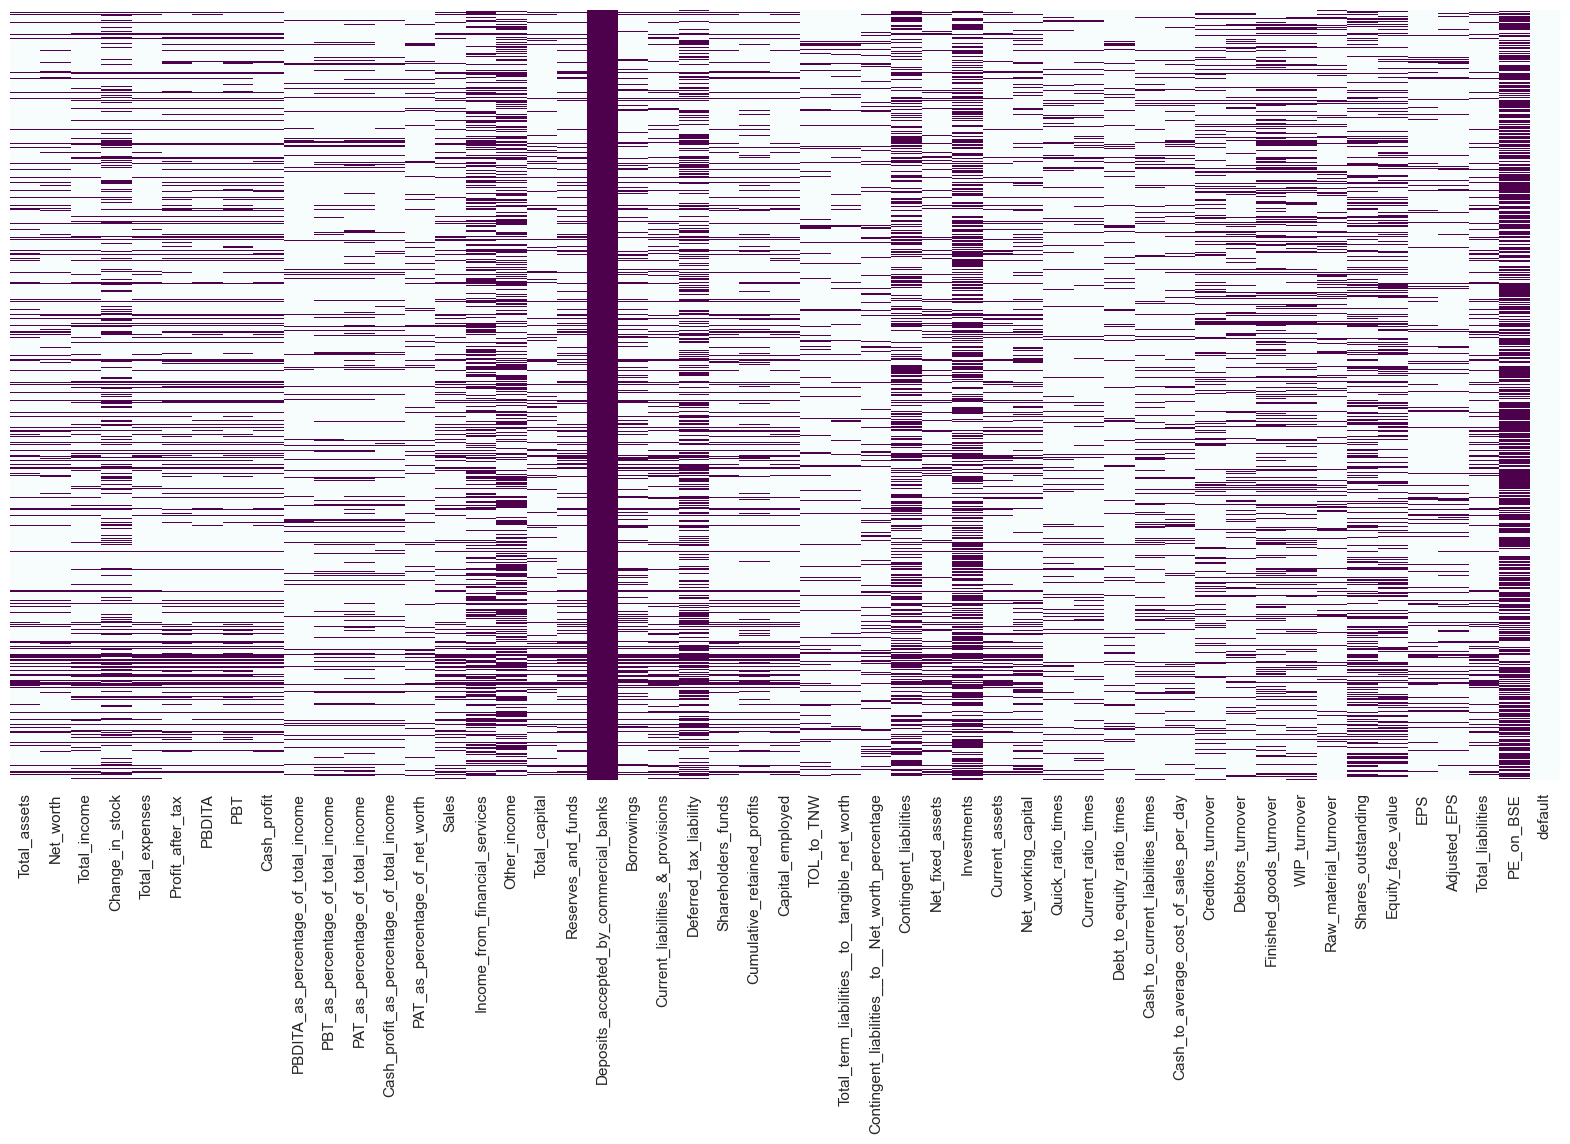

In [38]:
plt.figure(figsize = (20 , 10))
sns.heatmap(df.isnull() , cmap = 'BuPu' , cbar = False , yticklabels = False)
plt.show()

###### Insights : From heatmap we get entire whole Deposits_accepted_by_commercial_banks column get null values and where we see coloured lines means  it contains null values

In [39]:
df.isnull().sum().sort_values(ascending = False) / len(df) * 100

Deposits_accepted_by_commercial_banks               100.000000
PE_on_BSE                                            67.636261
Investments                                          50.833098
Other_income                                         45.523863
Contingent_liabilities                               42.784524
Deferred_tax_liability                               41.541937
Income_from_financial_services                       38.604914
Equity_face_value                                    31.855408
Shares_outstanding                                   30.641062
Change_in_stock                                      30.471618
Finished_goods_turnover                              30.104490
WIP_turnover                                         26.998023
Borrowings                                           22.536007
Profit_after_tax                                     19.994352
PBT                                                  19.966111
Net_working_capital                                  19

#### we are already mark down this columns for drop

###### null values Before making outliers as  null values

#### Income_from_financial_services 26.404970
#### Other_income 36.571590
#### Deposits_accepted_by_commercial_banks 100.000000
#### Deferred_tax_liability 32.194295
#### Contingent_liabilities 33.549845
#### Investments 40.525275
#### PE_on_BSE 61.959898

#### Null values after making outliers as nullvalues

##### Deposits_accepted_by_commercial_banks               100.000000
##### PE_on_BSE                                            67.636261
##### Investments                                          50.833098
##### Other_income                                         45.523863
##### Contingent_liabilities                               42.784524
##### Deferred_tax_liability                               41.541937
##### Income_from_financial_services                       38.604914

In [40]:
print('The shape of dataset before dropping the columns :' , df.shape)

The shape of dataset before dropping the columns : (3541, 51)


#### We dropping those features who has null values more than 25%  before the outliers make as null values

In [41]:
df.drop({'Deposits_accepted_by_commercial_banks' , 'PE_on_BSE' , 'Investments' , 'Other_income' ,
         'Contingent_liabilities' , 'Deferred_tax_liability' , 'Income_from_financial_services'} , 
        axis = 1 , inplace = True)

In [42]:
print('The shape of dataset after dropping the columns :' , df.shape)

The shape of dataset after dropping the columns : (3541, 44)


#### we make dataset segregate into indepenfent and dependent variables

In [43]:
predictors = df.drop(['default'] , axis = 1)
response = df['default']

In [44]:
predictors.head(2)

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_percentage_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.46,...,3.62,3.85,NaN,21.78,7.71,NaN,10.0,NaN,7.10,NaN
1,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,NaN,158.6,18.53,...,9.80,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0


In [45]:
response.head(2)

0    1
1    1
Name: default, dtype: int32

### Feature Scaling

In [46]:
scaler = StandardScaler()

In [47]:
scaler

StandardScaler()

In [48]:
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors) , columns = predictors.columns)

In [49]:
scaled_predictors.head(2)

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_percentage_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.127839,...,-0.616560,-0.597170,NaN,1.143298,0.105724,NaN,0.0,NaN,1.046657,NaN
1,0.857364,1.040021,1.16956,2.929613,1.187136,3.369301,2.796202,NaN,2.463083,1.046692,...,0.639601,-0.232877,-0.366744,-0.417817,0.744868,1.222365,0.0,1.165458,1.675933,0.857364


##### We concat scaled_predictors and response

In [50]:
df_scaled = pd.concat([scaled_predictors , response] , axis = 1)

In [51]:
df_scaled.head(2)

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_percentage_of_total_income,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,default
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.127839,...,-0.597170,NaN,1.143298,0.105724,NaN,0.0,NaN,1.046657,NaN,1
1,0.857364,1.040021,1.16956,2.929613,1.187136,3.369301,2.796202,NaN,2.463083,1.046692,...,-0.232877,-0.366744,-0.417817,0.744868,1.222365,0.0,1.165458,1.675933,0.857364,1


### Imputing missing values by KNNImputer

In [52]:
imputer = KNNImputer(n_neighbors=15)

#### Fill the missing values by KNNImputer

In [53]:
df_impute = pd.DataFrame(imputer.fit_transform(df_scaled) , columns = df_scaled.columns)

In [54]:
df_impute.head(2)

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_percentage_of_total_income,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,default
0,0.106577,0.395550,0.129175,-0.280733,0.111112,0.855999,0.424195,0.981546,0.610398,0.127839,...,-0.597170,0.642968,1.143298,0.105724,0.016044,0.0,0.847408,1.046657,0.106577,1.0
1,0.857364,1.040021,1.169560,2.929613,1.187136,3.369301,2.796202,2.570725,2.463083,1.046692,...,-0.232877,-0.366744,-0.417817,0.744868,1.222365,0.0,1.165458,1.675933,0.857364,1.0


In [55]:
df_impute.isnull().sum()

Total_assets                                        0
Net_worth                                           0
Total_income                                        0
Change_in_stock                                     0
Total_expenses                                      0
Profit_after_tax                                    0
PBDITA                                              0
PBT                                                 0
Cash_profit                                         0
PBDITA_as_percentage_of_total_income                0
PBT_as_percentage_of_total_income                   0
PAT_as_percentage_of_total_income                   0
Cash_profit_as_percentage_of_total_income           0
PAT_as_percentage_of_net_worth                      0
Sales                                               0
Total_capital                                       0
Reserves_and_funds                                  0
Borrowings                                          0
Current_liabilities_&_provis

#### Insights : We done with missing values

#### Why we doing that approach because we have large number of columns and large number of outliers are there thats why we are not able to visualize that number of outliers and we have large number of missing values  so just we handle outliers and missing values in one go thats we follow this approch (first treat outliers by null values and then transform the null values) 

#### Check Correlation between independent vs dependent variable

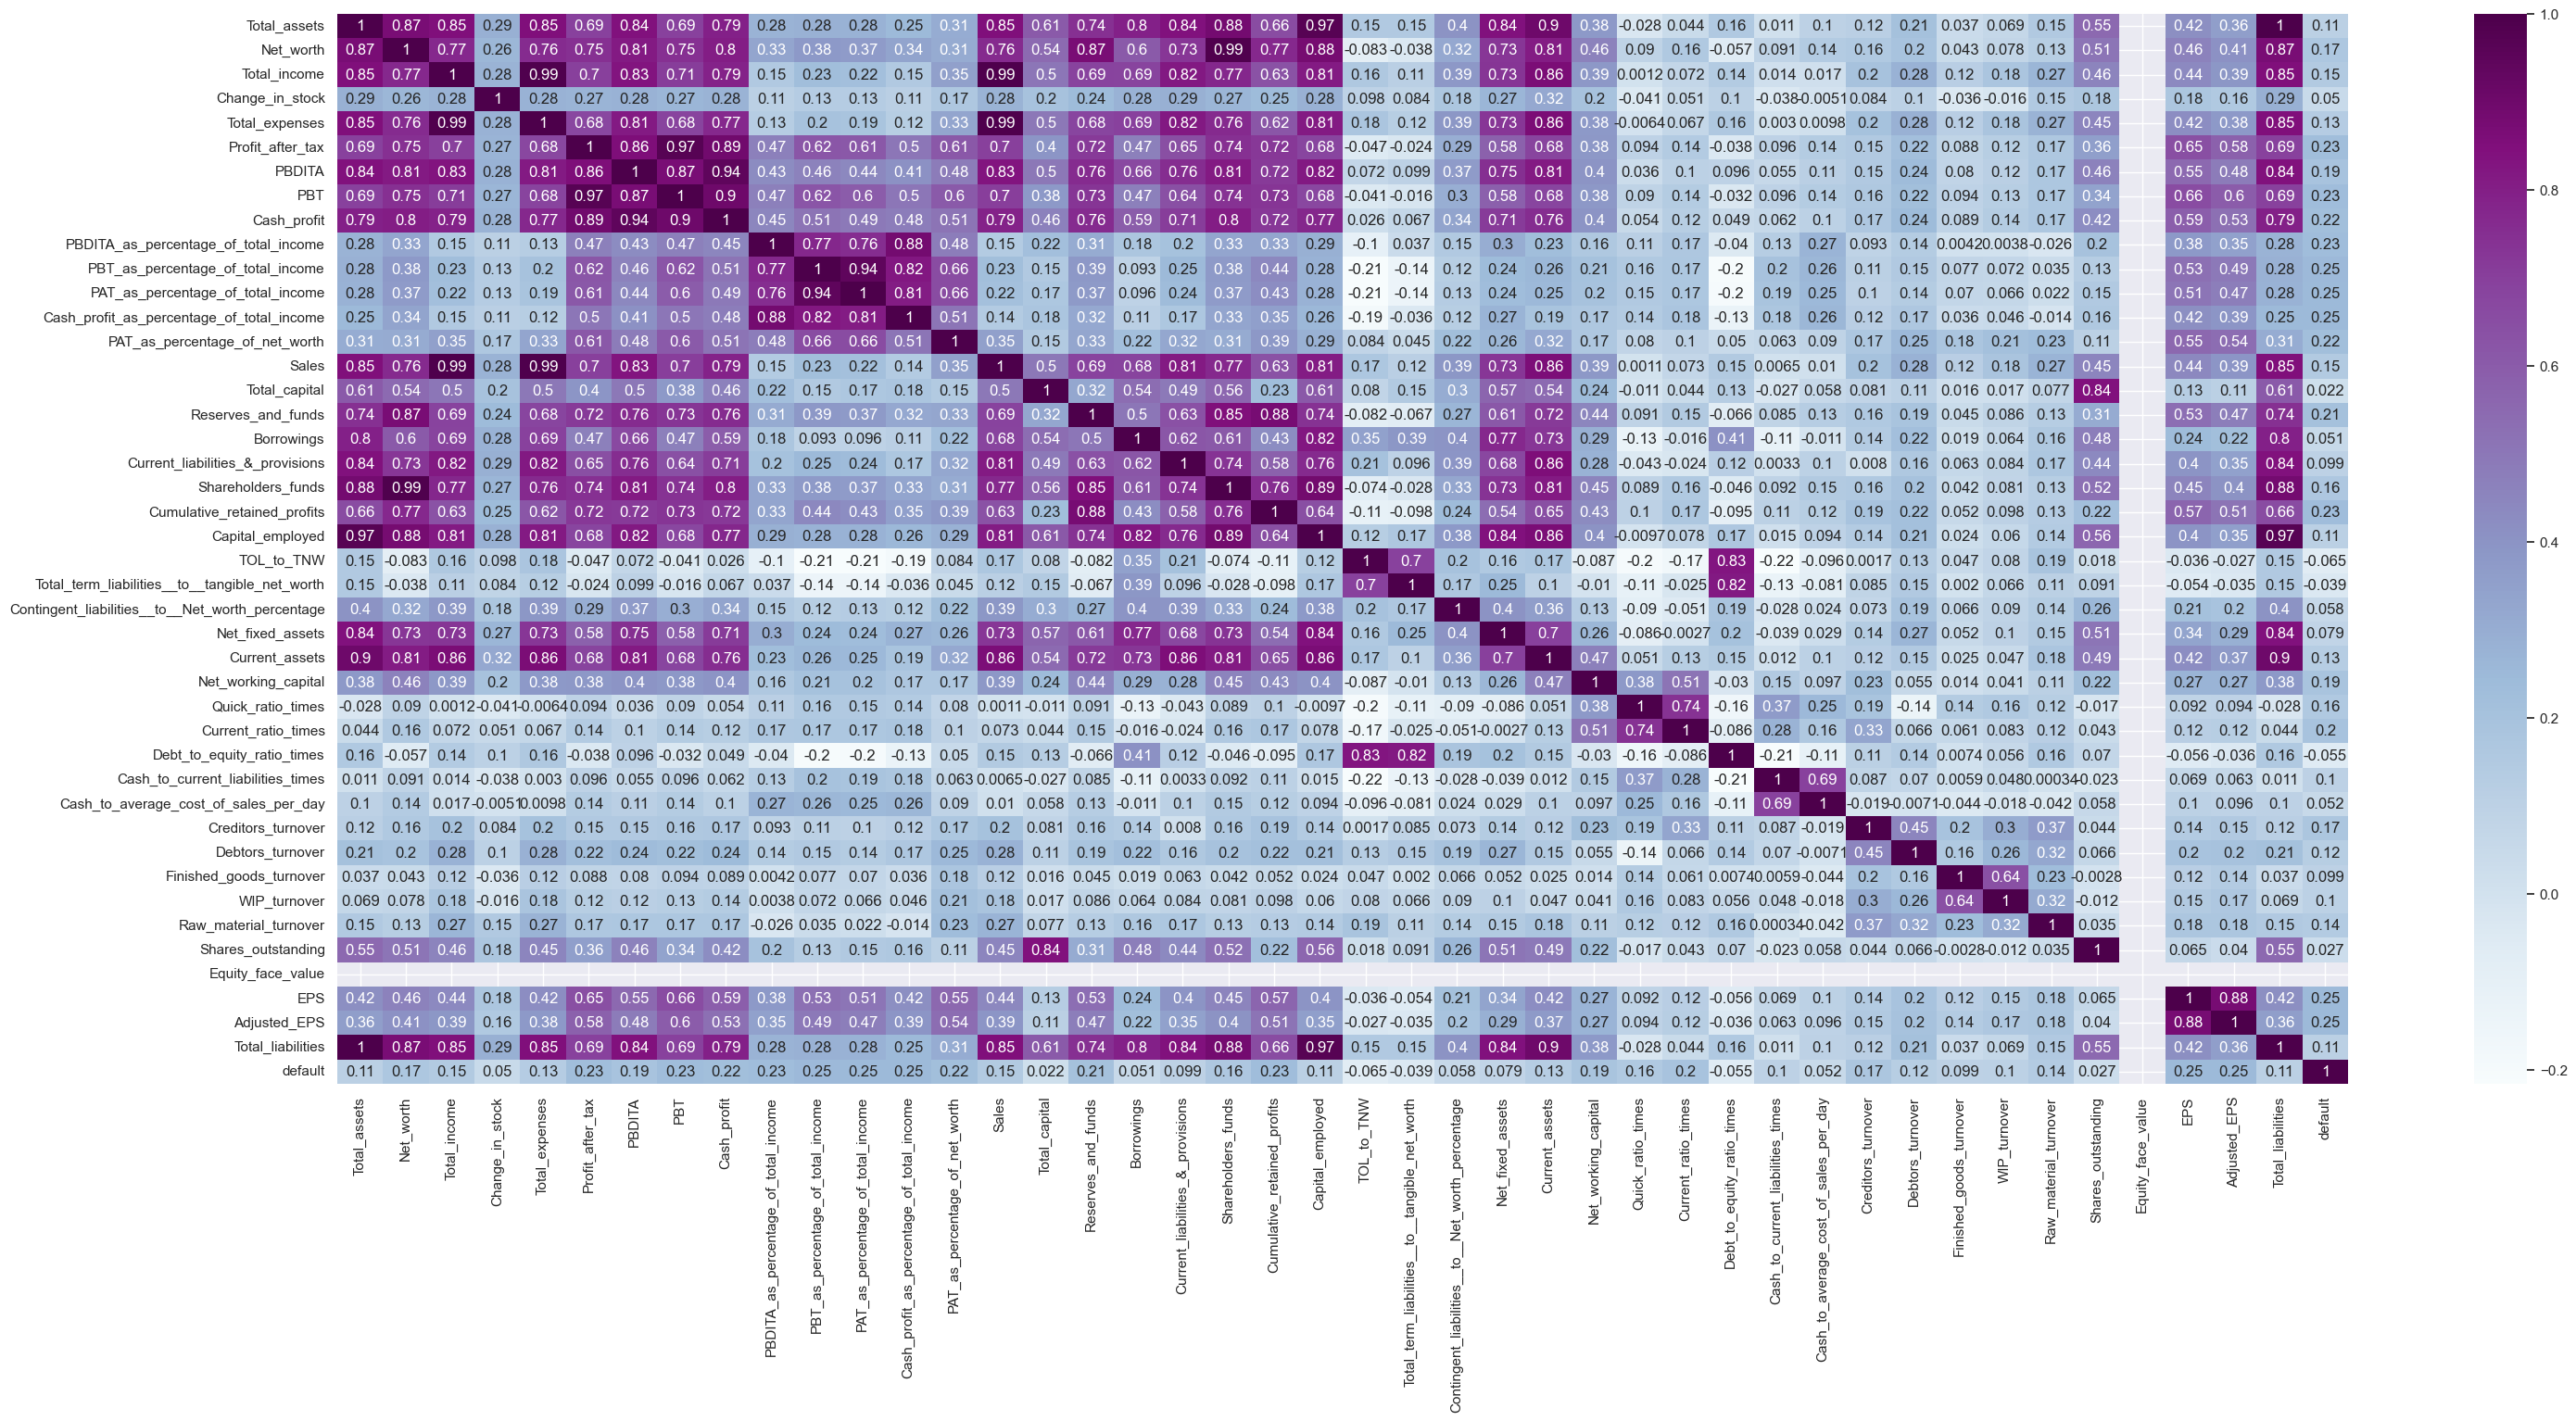

In [56]:
plt.figure(figsize = (35 , 15))
sns.heatmap(df_impute.corr() , annot = True , cbar = True , cmap = 'BuPu')
plt.show()

#### Insights : we don't have any high collinearity or multi collinearity in dependent vs independent.

### You can check with Variance Inflation Factor also

### Data split into train and test

##### Data split into independent and dependent variable

In [57]:
predictors = df_impute.drop('default' , axis = 1)
response = df_impute['default']

In [58]:
predictors.head(2)

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_percentage_of_total_income,...,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
0,0.106577,0.395550,0.129175,-0.280733,0.111112,0.855999,0.424195,0.981546,0.610398,0.127839,...,-0.616560,-0.597170,0.642968,1.143298,0.105724,0.016044,0.0,0.847408,1.046657,0.106577
1,0.857364,1.040021,1.169560,2.929613,1.187136,3.369301,2.796202,2.570725,2.463083,1.046692,...,0.639601,-0.232877,-0.366744,-0.417817,0.744868,1.222365,0.0,1.165458,1.675933,0.857364


In [59]:
response.head(2)

0    1.0
1    1.0
Name: default, dtype: float64

In [60]:
x_train , x_test , y_train , y_test = train_test_split(predictors , response , test_size = 0.25 , random_state = 2 , stratify = response)

In [61]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(2655, 43) (886, 43) (2655,) (886,)


#### Here we have large number of features so are not aware about which features are use / which are significant so thats why we use one Feature selection method (we can use PCA also but PCA is black box technique . where we completely unaware about which features as well as which values is used for significance)

### Feature Selection Technique

#### Recursive Feature Elimination

In [62]:
from sklearn.feature_selection import RFE

## LogisticeRegression with RFE

In [63]:
logit = LogisticRegression()

#### RFE

In [64]:
selector = RFE(estimator = logit,
    n_features_to_select=25,
    step=1)

In [65]:
selector

RFE(estimator=LogisticRegression(), n_features_to_select=25)

#### Insights : 15 is taken from 1/3 rd of total no. of features means we want most 15 significant features which has 1st rank . and its not not thumb rule for 1/3 rd data.
#### You can go with trial and error based approch first check with this (1/3rd) if not get performance then again change it

#### Here we build the logistic Regression with RFE . we passing estimator as Logistic Regression in RFE

In [66]:
selector.fit(x_train , y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=25)

#### No. of features we taken for building logistic regression algorithm

In [67]:
selector.n_features_

25

#### Ranking of features 

In [68]:
selector.ranking_

array([10, 14,  6,  1,  1,  4,  1,  3,  2,  1, 12,  1,  1,  8,  1,  1,  1,
        1,  9,  1,  1, 17, 11,  1, 16,  1,  1,  1, 13,  1,  1,  5, 18,  1,
       15,  1,  1,  1,  1, 19,  1,  7,  1])

##### Insights : which has 1st ranking that has been choosen by RFE technique as most significance and which has highest value it is least significance

In [69]:
df_selector = pd.DataFrame({'Rank' : selector.ranking_ , 'features' : predictors.columns})
df_selector[df_selector['Rank'] == 1]

,Rank,features
3,1,Change_in_stock
4,1,Total_expenses
6,1,PBDITA
9,1,PBDITA_as_percentage_of_total_income
11,1,PAT_as_percentage_of_total_income
12,1,Cash_profit_as_percentage_of_total_income
14,1,Sales
15,1,Total_capital
16,1,Reserves_and_funds
17,1,Borrowings


##### Inisghts : we get highly significant features which is given by RFE(which has 1st rank)

#### Another approach for check siginificance

#### Correlation analysis on features

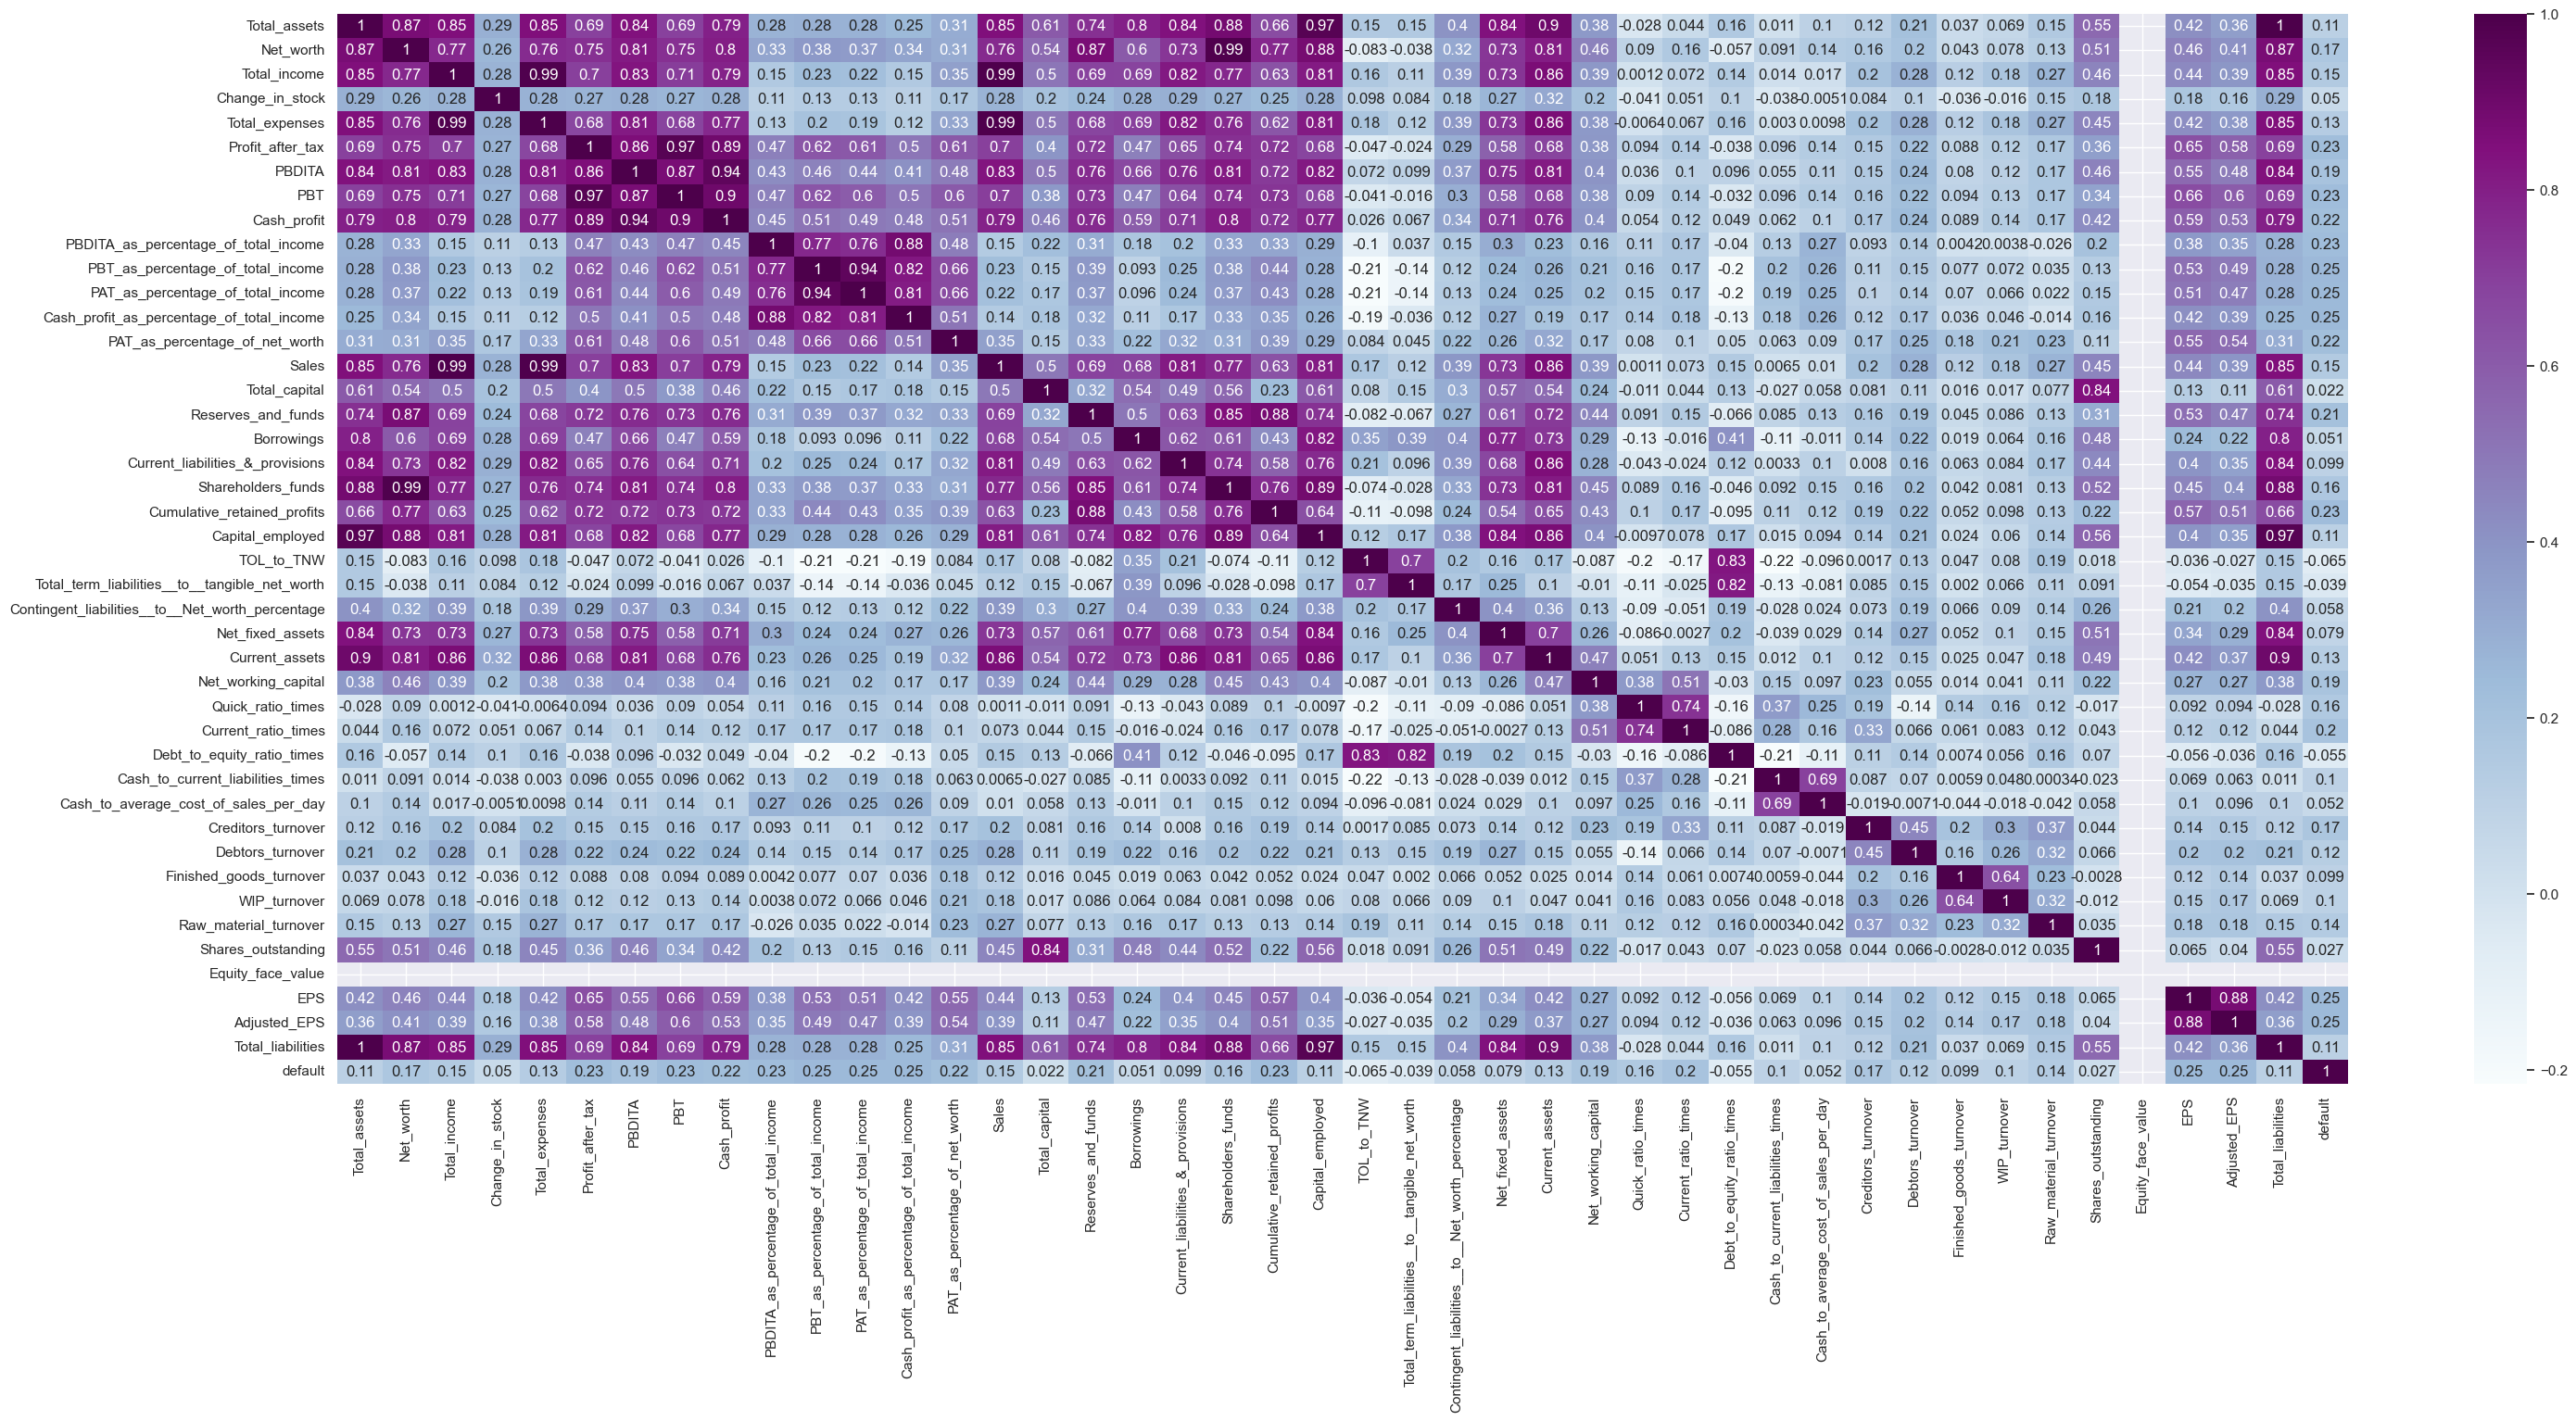

In [70]:
plt.figure(figsize = (35 , 15))
sns.heatmap(df_impute.corr() , annot = True , cbar = True , cmap = 'BuPu')
plt.show()

#### correlation with respect to dependent variable

In [71]:
pd.DataFrame(df_impute.corr()['default']).reset_index().rename(columns = {'index' : 'Features' , 'default' : 'corr'})

,Features,corr
0,Total_assets,0.111004
1,Net_worth,0.170292
2,Total_income,0.145760
3,Change_in_stock,0.050283
4,Total_expenses,0.133593
5,Profit_after_tax,0.230554
6,PBDITA,0.194384
7,PBT,0.232845
8,Cash_profit,0.222061
9,PBDITA_as_percentage_of_total_income,0.232093


#### Prediction of logisticRegression with RFE

In [72]:
response_train_pred = selector.predict(x_train)
response_test_pred = selector.predict(x_test)

##### Preformance Matrix

In [73]:
print(confusion_matrix(y_train , response_train_pred))
print('****'*10)
print(confusion_matrix(y_test , response_test_pred))
print('****'*10)
print(classification_report(y_train , response_train_pred))
print('****'*10)
print(classification_report(y_test , response_test_pred))
print('****'*10)
print(f'Training Accuracy of Logistic with RFE :{accuracy_score(y_train , response_train_pred)}')
print('****'*10)
print(f'Testing Accuracy of Logistic with RFE :{accuracy_score(y_test , response_test_pred)}')

[[  45  137]
 [  22 2451]]
****************************************
[[ 14  47]
 [  8 817]]
****************************************
              precision    recall  f1-score   support

         0.0       0.67      0.25      0.36       182
         1.0       0.95      0.99      0.97      2473

    accuracy                           0.94      2655
   macro avg       0.81      0.62      0.67      2655
weighted avg       0.93      0.94      0.93      2655

****************************************
              precision    recall  f1-score   support

         0.0       0.64      0.23      0.34        61
         1.0       0.95      0.99      0.97       825

    accuracy                           0.94       886
   macro avg       0.79      0.61      0.65       886
weighted avg       0.92      0.94      0.92       886

****************************************
Training Accuracy of Logistic with RFE :0.9401129943502825
****************************************
Testing Accuracy of Logistic wit

#### Insights : We have get very poor precision and recall as well so thats why we are not going with logistic regression approach because when data is imbalance and when we have classification model is there then we always check with accuracy parameters as f1_score(precision and recall)

In [74]:
response.value_counts(normalize = True)*100

1.0    93.137532
0.0     6.862468
Name: default, dtype: float64

#### Our data is imbalance so we go with trial and error approch. so we will make data is balance then we again check our performance

### SMOTE Technique

In [75]:
smote = SMOTE()

In [76]:
smote

SMOTE()

In [77]:
x_smote , y_smote = smote.fit_resample(predictors , response)

In [78]:
response.value_counts(normalize = True)*100

1.0    93.137532
0.0     6.862468
Name: default, dtype: float64

In [79]:
y_smote.value_counts(normalize = True) * 100

1.0    50.0
0.0    50.0
Name: default, dtype: float64

##### Data is balance now

#### Again split the data in train and test on balance data

In [80]:
x_train_sm , x_test_sm , y_train_sm , y_test_sm = train_test_split(x_smote , y_smote  , test_size = 0.25 , random_state = 3)

In [81]:
print(x_train_sm.shape , x_test_sm.shape , y_train_sm.shape , y_test_sm.shape)

(4947, 43) (1649, 43) (4947,) (1649,)


#### Again build logistic with RFE

In [82]:
selector.fit(x_train_sm , y_train_sm)

RFE(estimator=LogisticRegression(), n_features_to_select=25)

#### Predictions by logistic with RFE

In [83]:
selector.n_features_

25

In [84]:
y_train_pred_sm = selector.predict(x_train_sm)
y_test_pred_sm = selector.predict(x_test_sm)

#### check performance metrices after balancing data

In [85]:
print(confusion_matrix(y_train_sm , y_train_pred_sm))
print('****'*10)
print(confusion_matrix(y_test_sm , y_test_pred_sm))
print('****'*10)
print(classification_report(y_train_sm , y_train_pred_sm))
print('****'*10)
print(classification_report(y_test_sm , y_test_pred_sm))
print('****'*10)
print(f'Training Accuracy of Logistic with RFE :{accuracy_score(y_train_sm , y_train_pred_sm)}')
print('****'*10)
print(f'Testing Accuracy of Logistic with RFE :{accuracy_score(y_test_sm , y_test_pred_sm)}')

[[2285  211]
 [ 448 2003]]
****************************************
[[734  68]
 [146 701]]
****************************************
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.87      2496
         1.0       0.90      0.82      0.86      2451

    accuracy                           0.87      4947
   macro avg       0.87      0.87      0.87      4947
weighted avg       0.87      0.87      0.87      4947

****************************************
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87       802
         1.0       0.91      0.83      0.87       847

    accuracy                           0.87      1649
   macro avg       0.87      0.87      0.87      1649
weighted avg       0.87      0.87      0.87      1649

****************************************
Training Accuracy of Logistic with RFE :0.8667879522943198
****************************************
Testing Accuracy of Logistic wit

##### Insights : we  get Nice recall and precision (F1 score) after data balancing so we can going with logistic regression. but  we will check with another algorithm

#### Here initially I take 15 features in RFE that time I get different results when I take 25 as features value in RFE my performances get increased by 1% in precision , recall and F1 score and accuracy also. so you can take any no.of features in RFE 

## RandomForest

In [86]:
rf = RandomForestClassifier()

##### RandomForestwith RFE

In [87]:
rf = RFE(estimator = rf,
    n_features_to_select=15,
    step=1)

In [88]:
rf

RFE(estimator=RandomForestClassifier(), n_features_to_select=15)

#### Fit the model

In [89]:
rf.fit(x_train_sm , y_train_sm)

RFE(estimator=RandomForestClassifier(), n_features_to_select=15)

#### Prediction by rf

In [90]:
y_train_pred_rf = rf.predict(x_train_sm)
y_test_pred_rf = rf.predict(x_test_sm)

##### Preformance matrices of rf

In [91]:
print(confusion_matrix(y_train_sm , y_train_pred_rf))
print('****'*10)
print(confusion_matrix(y_test_sm , y_test_pred_rf))
print('****'*10)
print(classification_report(y_train_sm , y_train_pred_rf))
print('****'*10)
print(classification_report(y_test_sm , y_test_pred_rf))
print('****'*10)
print(f'Training Accuracy of Logistic with RFE :{accuracy_score(y_train_sm , y_train_pred_rf)}')
print('****'*10)
print(f'Testing Accuracy of Logistic with RFE :{accuracy_score(y_test_sm , y_test_pred_rf)}')

[[2496    0]
 [   0 2451]]
****************************************
[[767  35]
 [ 49 798]]
****************************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2496
         1.0       1.00      1.00      1.00      2451

    accuracy                           1.00      4947
   macro avg       1.00      1.00      1.00      4947
weighted avg       1.00      1.00      1.00      4947

****************************************
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       802
         1.0       0.96      0.94      0.95       847

    accuracy                           0.95      1649
   macro avg       0.95      0.95      0.95      1649
weighted avg       0.95      0.95      0.95      1649

****************************************
Training Accuracy of Logistic with RFE :1.0
****************************************
Testing Accuracy of Logistic with RFE :0.949060

##### Insights : RandomForest model get overfitted means training accuracy get 100%.so not relying on 100% accuracy

##### We try to overcome it by K Fold cross validation

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
cs = cross_val_score(rf , x_train_sm , y_train_sm , cv = 10)
print('Mean accuracy of RF is :' , cs.mean())

Mean accuracy of RF is : 0.9516770948349895


### Just try without smote

In [94]:
rf.fit(x_train , y_train)

RFE(estimator=RandomForestClassifier(), n_features_to_select=15)

In [95]:
rf

RFE(estimator=RandomForestClassifier(), n_features_to_select=15)

In [96]:
y_train_pred_rf = rf.predict(x_train)
y_test_pred_rf = rf.predict(x_test)

#### performance metrices of rf with smote

In [97]:
print(confusion_matrix(y_train , y_train_pred_rf))
print('****'*10)
print(confusion_matrix(y_test , y_test_pred_rf))
print('****'*10)
print(classification_report(y_train , y_train_pred_rf))
print('****'*10)
print(classification_report(y_test , y_test_pred_rf))
print('****'*10)
print(f'Training Accuracy of Logistic with RFE :{accuracy_score(y_train , y_train_pred_rf)}')
print('****'*10)
print(f'Testing Accuracy of Logistic with RFE :{accuracy_score(y_test , y_test_pred_rf)}')

[[ 182    0]
 [   0 2473]]
****************************************
[[ 25  36]
 [  9 816]]
****************************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       182
         1.0       1.00      1.00      1.00      2473

    accuracy                           1.00      2655
   macro avg       1.00      1.00      1.00      2655
weighted avg       1.00      1.00      1.00      2655

****************************************
              precision    recall  f1-score   support

         0.0       0.74      0.41      0.53        61
         1.0       0.96      0.99      0.97       825

    accuracy                           0.95       886
   macro avg       0.85      0.70      0.75       886
weighted avg       0.94      0.95      0.94       886

****************************************
Training Accuracy of Logistic with RFE :1.0
****************************************
Testing Accuracy of Logistic with RFE :0.949209

##### K Fold cross validation on rf without smote

In [98]:
cs = cross_val_score(rf , x_train , y_train , cv = 10)
print('Mean accuracy of rf is :' , cs.mean())

Mean accuracy of rf is : 0.9532983401900978
